In [1]:

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
a=[" "," "]
path = "C:/Users/Unique/Desktop/Accident-Prediction-master/"
df = pd.read_csv( path + "accidents.csv" )
print ("The dataset has %d rows and %d columns" % (df.shape[0] , df.shape[1]))
a[0]=df.iloc[28801:36000,:]
a[1]=df.iloc[0:21600,:]
b=df.iloc[21601:28800,:]
print(a)
print(b)
#df = df.drop(['desc'], axis=1)
#df['lat'] = df['lat'] + 40
#df['lon'] = df['lon'] + 149
#df['desc'] = 'NA'
#df.to_csv('export.csv',index=False )


The dataset has 36314 rows and 10 columns
[                                                wkt_geom  code  severity  \
28801  POINT(6025204.69674642663449049 2164020.827542...   201         3   
28802  POINT(6074032.41969816666096449 2002844.616964...   243         2   
28803  POINT(6120230.78295697458088398 2136079.965820...   243         3   
28804  POINT(6037333.82711438369005919 2162866.495584...   201         3   
28805  POINT(6059742.67944238521158695 2110214.996832...   243         3   
...                                                  ...   ...       ...   
35995  POINT(6142834.84498565644025803 1941254.761029...   243         3   
35996  POINT(6148605.75811859872192144 1991026.957167...   201         3   
35997  POINT(6148701.72334411088377237 1990999.643419...   201         3   
35998  POINT(6104758.54560113791376352 2021061.811918...   243         2   
35999  POINT(6154629.43239638209342957 2081091.306250...   201         3   

                    time        lat  desc   

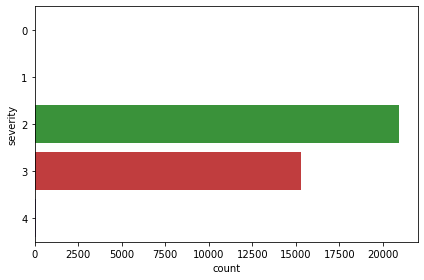

In [2]:
#characterstick graph
#severity vs count

sns.countplot(y = "severity" , data = df )
plt.tight_layout()

In [3]:
#here we check for outlier and boundries

pd.DataFrame( {"count": df["severity"].value_counts().values } , index = df["severity"].value_counts().index )

,count
2,20944
3,15296
4,54
1,19
0,1


In [4]:
df = df.loc[df["severity"] >  1].loc[df["severity"] < 4]

In [5]:
df["month"] = df["time"].apply(lambda x:int(x[:2]))
df["day"] = df["time"].apply(lambda x:int(x[3:5]))
df["year"] = df["time"].apply(lambda x:int(x[6:8]))
df["hour"] =  df["time"].apply(lambda x: int(x[9:11]) if str(x)[15] == 'A' else 12 + int(x[9:11])  )
df["lon"] = df["lon"].apply(lambda x:abs(x)) #so that multinomialNB works (only with positive features)
#creating the date at the datetime format (easier to deal with)
df[ "date" ]= df[["month" , "day" ,"year"]].apply(lambda x:pd.datetime(month = x['month'] , day = x['day']  , year = 2000+x["year"]), axis = 1)
df["weekday"] =  df["date"].apply(lambda x:x.weekday())


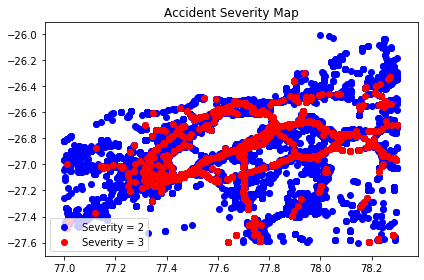

In [6]:
#plotting the dataset with a different color depending on the severity (2,3)
#longitude vs lattitude

df2 = df.loc[df["severity"] == 2]
df3 = df.loc[df["severity"] == 3]

xx2 , yy2 = df2["lat"] , -df2["lon"]
xx3 , yy3 = df3["lat"] , -df3["lon"]

pts2 = plt.scatter(xx2,yy2,color = 'b' )
pts3 = plt.scatter(xx3,yy3,color = 'r' )
plt.legend((pts2, pts3), ('Severity = 2', 'Severity = 3'),loc='lower left')
plt.title("Accident Severity Map")
plt.tight_layout()

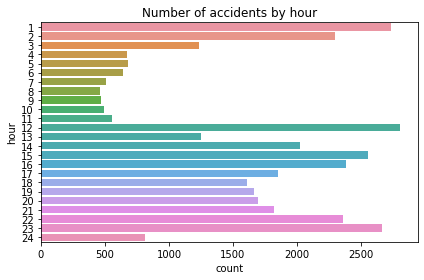

In [7]:
#classifiction , hour vs counts

sns.countplot(y = "hour" , data = df , order = range(1,25))
plt.title("Number of accidents by hour")
plt.tight_layout()

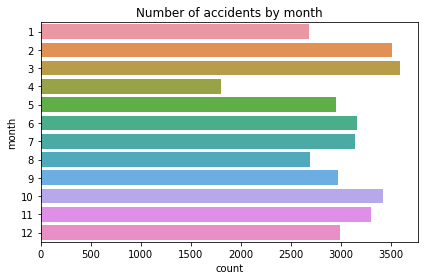

In [8]:
#classification , month vs count

sns.countplot(y = "month" , data = df)
plt.title("Number of accidents by month")
plt.tight_layout()

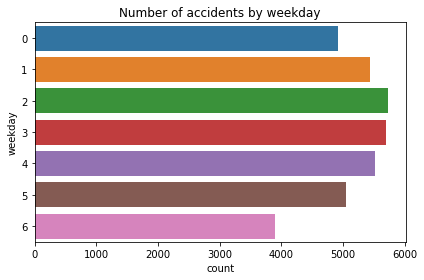

In [9]:
#classification , weekdays vs count

sns.countplot(y = "weekday" , data = df)
plt.title("Number of accidents by weekday")
plt.tight_layout()

In [10]:
X_train=[" "," "]
y_train=[" "," "]

a = df[["month" , "hour" , "year", "weekday" ,"lon" , "lat"]]
b = df["severity"].apply(lambda x:x-2) # shifting to 0-1 values instead of 2-3
X_train[0]=df[["month" , "hour" , "year", "weekday" ,"lon" , "lat"]].iloc[28801:36000,:].values
X_train[1]=df[["month" , "hour" , "year", "weekday" ,"lon" , "lat"]].iloc[0:21600,:].values
X_test=df[["month" , "hour" , "year", "weekday" ,"lon" , "lat"]].iloc[21601:28800,:].values
y_train[0]=df[["severity"]].iloc[28801:36000,:].apply(lambda x:x-2).values
y_train[1]=df[["severity"]].iloc[0:21600,:].apply(lambda x:x-2).values
y_test=df[["severity"]].iloc[21601:28800,:].apply(lambda x:x-2).values
#print(X_test)
#here we assign test size as 20% of actual data set 
# random state is set as 42 ( or 1 ) also from the reference of " The Hitchhiker's Guide to the Galaxy" 
# we defined random state to get consistent and same results , regardless of the training iterations 
# so that the values in the train and test sets are homogenous

from sklearn.model_selection import train_test_split 
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.20,random_state=42)

In [11]:
#using the metrics package
#algorithm's func to print the results
from sklearn.metrics import *
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
 
def printScores(y_test, y_pred, classif_name):    
    print ("--------------  "  + classif_name + "  ------------------")
    print ("recall : %0.2f" %  recall_score(y_test, y_pred) )
    print ("precision : %0.2f" %  precision_score(y_test, y_pred))   
    print ("f1 : %0.2f" %  f1_score(y_test, y_pred))
    print ("accuracy : %0.2f" %  accuracy_score(y_test, y_pred))
    print ("---------------------------------------------------")  

In [12]:
#basic model to check accurary (worst)

sev = b.value_counts()
pd.DataFrame(sev)

,severity
0,20944
1,15296


In [13]:
#here we will calculate the worst accuracy 

print ("worst accuracy: " , max(sev)/float(sum(sev)))

worst accuracy:  0.577924944812362


In [14]:
#Decision tree

from sklearn import tree
clf = tree.DecisionTreeClassifier()
for i in range(0,2):
    clf.fit(X_train[i],y_train[i])
y_pred = clf.predict(X_test)
printScores(y_test, y_pred, "tree")

--------------  tree  ------------------
recall : 0.88
precision : 0.87
f1 : 0.88
accuracy : 0.89
---------------------------------------------------


In [15]:
pd.DataFrame(100*clf.feature_importances_ , index = a_train.columns)

,0
month,3.311429
hour,5.197327
year,0.000000
weekday,3.430318
lon,44.884995
lat,43.175930


In [16]:
#random forest

# Fitting the classifier into the Training set
#X_train2 , X_test2 = X_train[["lat" , "lon" ]]  , X_test[["lat" , "lon" ]]
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
classifier = RandomForestClassifier(n_estimators = 100)
for i in range(0,2):
    classifier.fit(X_train[i],y_train[i])

# Predicting the test set results

#for i in range(0,2):
y_Pred = classifier.predict(X_test)

printScores(y_test, y_Pred, "RandomForestClassifier")


--------------  RandomForestClassifier  ------------------
recall : 0.88
precision : 0.81
f1 : 0.84
accuracy : 0.86
---------------------------------------------------
